In [2]:
import os 
import tarfile
import urllib
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

### Downloading the data

In [4]:
#Downloading the data
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [5]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data() #loading the data

In [21]:
# from sklearn.model_selection import train_test_split
# train_set , test_set = train_test_split(housing,test_size=0.2,random_state=42) 

### Exploring the data

In [7]:
# housing.info()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


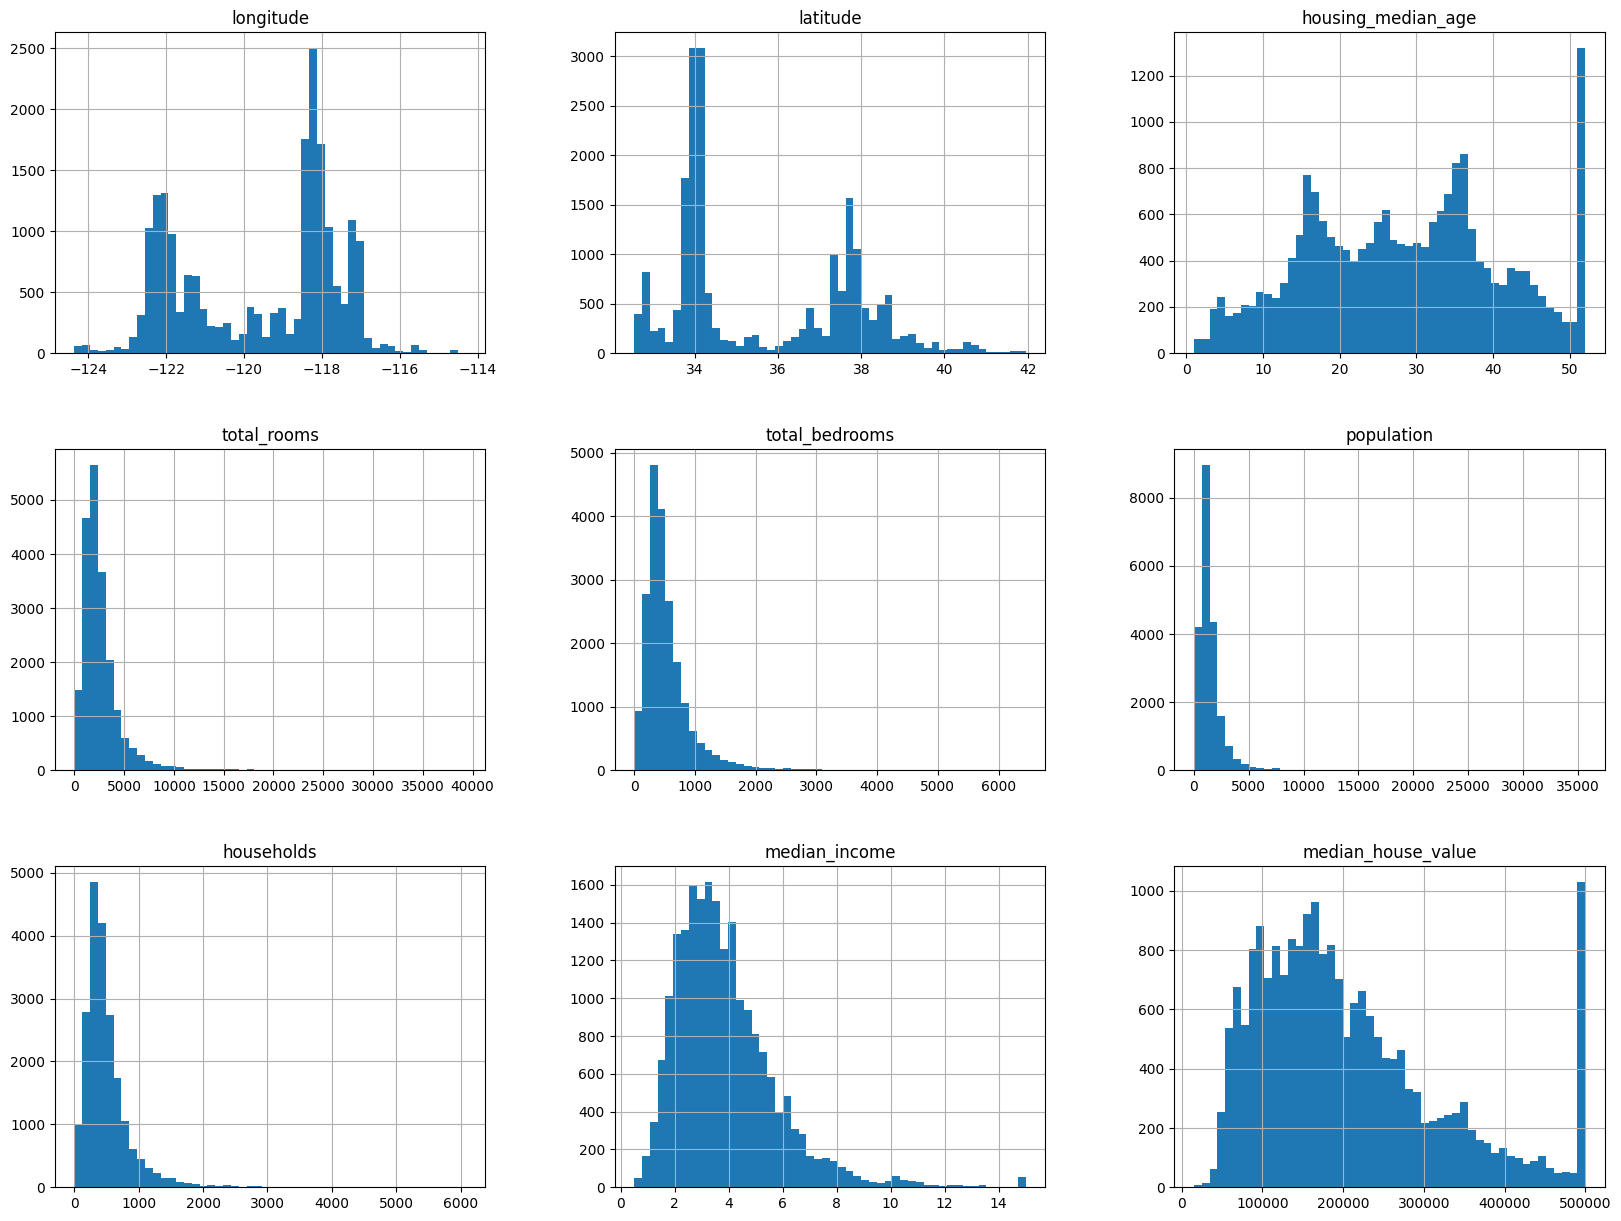

In [9]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [10]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: >

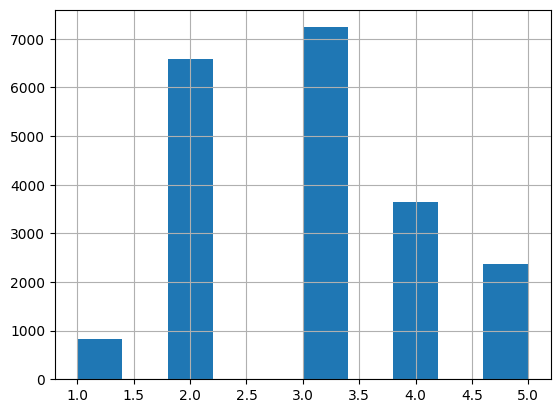

In [11]:
# housing['median_income'].hist()
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist() #for stratified data

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split_data = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index , test_index in split_data.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [13]:
# droping income_cat attribute 
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [14]:
train_data = strat_train_set.copy()

### Discover and Visualize the Data to Gain Insights

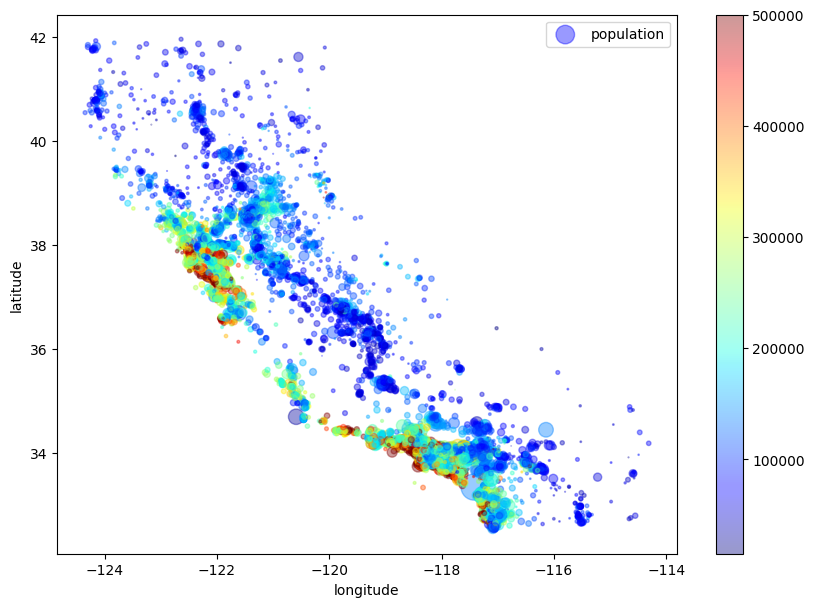

In [15]:
# Here we are visualising the population and median_house_values
train_data.plot(kind="scatter",x="longitude", y="latitude",alpha=0.4,
                s = train_data["population"]/100,label="population", figsize=(10,7),
                c = train_data["median_house_value"],cmap = plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [16]:
#defining some extra useful attributes
train_data["rooms_per_household"] = train_data["total_rooms"]/train_data["households"]
train_data["bedrooms_per_room"] = train_data["total_bedrooms"]/train_data["total_rooms"]
train_data["population_per_household"]=train_data["population"]/train_data["households"]

In [17]:
# taking out the predictors and target values from the dataset
train_data = strat_train_set.drop("median_house_value", axis=1) #drop creates a copy and does not the strat_train_set
train_labels = strat_train_set["median_house_value"].copy()

## Data cleaning

In [18]:
train_data.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,1208.0,501.0,4.1964,<1H OCEAN


In [22]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
train_data_num = train_data.drop("ocean_proximity", axis=1)
imputer.fit(train_data_num)
# train_data_num.median().values
X = imputer.transform(train_data_num)

In [23]:
# Handling Text and Categorical Attributes
train_data_cat = train_data[["ocean_proximity"]]
# train_data_cat.head(10)
train_data_cat.describe()

,ocean_proximity
count,16512
unique,5
top,<1H OCEAN
freq,7277


In [27]:
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()
# train_data_cat_encoded = ordinal_encoder.fit_transform(train_data_cat)
# train_data_cat_encoded[:10]

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
train_data_cat_1hot = cat_encoder.fit_transform(train_data_cat)
train_data_cat_1hot.toarray()
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(train_data.values)

In [25]:
# feature scaling and transformation pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("attribs_adder",CombinedAttributesAdder()),
    ("scaler",StandardScaler())
])

In [28]:
# adding 2 pipeline 
from sklearn.compose import ColumnTransformer

num_attribs = list(train_data_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

train_data_prepared = full_pipeline.fit_transform(train_data)

When calling the full_pipeline.fit_transform(train_data) it calls the num_pipeline which adds median to missing values , adds extra attributes to the train_data and also scales the data . After that it call OneHotEncoder for categorical data transformation

## Training Model

### Linear regressor model

In [78]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_data_prepared,train_labels)


LinearRegression()

In [85]:
# lets find the prediction on small amount of data
some_data = train_data.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = full_pipeline.fit_transform(some_data)
print("prediction: ",lin_reg.predict(some_data_prepared))

ValueError: X has 15 features, but LinearRegression is expecting 16 features as input.

### RandomForestRegressor

In [86]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_data_prepared, train_labels)


RandomForestRegressor()

In [33]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [87]:
from sklearn.metrics import mean_squared_error
train_data_predictions = forest_reg.predict(train_data_prepared)
forest_mse = mean_squared_error(train_labels, train_data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse # score on training set


18779.42083940478

In [92]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg,train_data_prepared,train_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_score = np.sqrt(-forest_scores)
display_scores(forest_rmse_score)



Scores: [51488.19373257 48892.94887351 46894.70080813 51873.75576406
 47594.50855961 52196.51602062 52420.74067412 49628.42463213
 48631.09364271 53945.78761962]
Mean: 50356.66703270747
Standard deviation: 2222.032464041494


EXERCISE 01 : Try a Support Vector Machine regressor (sklearn.svm.SVR) with various hyper‐
parameters, such as kernel="linear" (with various values for the C hyperpara‐
meter) or kernel="rbf" (with various values for the C and gamma
hyperparameters). Don’t worry about what these hyperparameters mean for now.
How does the best SVR predictor perform?

In [29]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='linear')
svm_reg.fit(train_data_prepared,train_labels)

SVR(kernel='linear')

In [31]:
from sklearn.metrics import mean_squared_error
svm_train_data_predictions = svm_reg.predict(train_data_prepared)
svm_mse = mean_squared_error(train_labels,svm_train_data_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse


111095.06635291968

In [ ]:
from sklearn.model_selection import cross_val_score
svm_scores = cross_val_score(svm_reg,train_data_prepared,train_labels,scoring="neg_mean_squared_error",cv=10)
svm_rmse_score = np.sqrt(-svm_scores)
display_scores(svm_rmse_score)

## FINE TUNING THE MODEL

In [93]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(train_data_prepared,train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [94]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [95]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [96]:
cv_result = grid_search.cv_results_
for mean_score ,params in zip(cv_result["mean_test_score"],cv_result["params"]):
    print(np.sqrt(-mean_score),params)

64126.565066640935 {'max_features': 2, 'n_estimators': 3}
55154.960619228994 {'max_features': 2, 'n_estimators': 10}
52658.015402443416 {'max_features': 2, 'n_estimators': 30}
60661.49815115219 {'max_features': 4, 'n_estimators': 3}
52777.850644708626 {'max_features': 4, 'n_estimators': 10}
50476.63544212952 {'max_features': 4, 'n_estimators': 30}
59020.11325143993 {'max_features': 6, 'n_estimators': 3}
52322.56432906737 {'max_features': 6, 'n_estimators': 10}
49893.35381639506 {'max_features': 6, 'n_estimators': 30}
58751.47717983435 {'max_features': 8, 'n_estimators': 3}
51999.6335510905 {'max_features': 8, 'n_estimators': 10}
49969.577350579944 {'max_features': 8, 'n_estimators': 30}
62608.290420059566 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54770.941329140216 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59568.09338928731 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52577.49972360194 {'bootstrap': False, 'max_features': 3, 'n_estimator

## Support Vector Regression

EXERCISE 01 : Try a Support Vector Machine regressor (sklearn.svm.SVR) with various hyper‐
parameters, such as kernel="linear" (with various values for the C hyperpara‐
meter) or kernel="rbf" (with various values for the C and gamma
hyperparameters). Don’t worry about what these hyperparameters mean for now.
How does the best SVR predictor perform?

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel':['linear'],'C':[3000., 10000., 30000.0]},
    {'kernel':['rbf'],'C':[300., 1000.0],'gamma':[ 1.0, 3.0]},
]

grid_search = GridSearchCV(svm_reg,param_grid,scoring='neg_mean_squared_error',cv=5,verbose=2)
grid_search.fit(train_data_prepared,train_labels)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ............................C=3000.0, kernel=linear; total time=  15.6s
[CV] END ............................C=3000.0, kernel=linear; total time=  15.8s
[CV] END ............................C=3000.0, kernel=linear; total time=  15.7s
[CV] END ............................C=3000.0, kernel=linear; total time=  16.0s
[CV] END ............................C=3000.0, kernel=linear; total time=  15.9s
[CV] END ...........................C=10000.0, kernel=linear; total time=  20.2s
[CV] END ...........................C=10000.0, kernel=linear; total time=  19.9s
[CV] END ...........................C=10000.0, kernel=linear; total time=  20.3s
[CV] END ...........................C=10000.0, kernel=linear; total time=  19.4s
[CV] END ...........................C=10000.0, kernel=linear; total time=  19.7s
[CV] END ...........................C=30000.0, kernel=linear; total time=  30.7s
[CV] END ...........................C=30000.0, ke

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid=[{'C': [3000.0, 10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [300.0, 1000.0], 'gamma': [1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [39]:
grid_search.best_estimator_
neg_mse = grid_search.best_score_
print(np.sqrt(-neg_mse))

70286.61835383571


RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

rnd_search = RandomizedSearchCV(svm_reg,param_distribs,n_iter=50,scoring='neg_mean_squared_error',cv=5,random_state=42,verbose=2)
rnd_search.fit(train_data_prepared,train_labels)

# negative_mse = rnd_search.best_score_
# rmse = np.sqrt(-negative_mse)
# rmse
# rnd_search.best_params_

## Saving the model

In [97]:
final_model = grid_search.best_estimator_

In [98]:
import joblib
joblib.dump(final_model,"final_model.pkl")
my_model_loaded = joblib.load("final_model.pkl")

## Testing the model on TEST DATASET

In [100]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

ValueError: Found unknown categories ['ISLAND'] in column 0 during transform